In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
%matplotlib inline 

In [2]:
df = pd.read_csv('df_hdi_complete.csv')
df.head()

,RHDI,HDI,LE,EYS,MYS,GNI,GDIV,GIIV,IHDI,ILE,...,WAFI,CDEP,CDE,FA,FAC,DMC,RLI,SLF,RDE,Continent
0,1,0.957,82.40,18.06615,12.897750,66494.25217,0.989939,0.045000,0.899,3.0,...,100.000000,8.303974,0.10907,33.177860,-0.115284,21.821970,0.93923,84.2811,2.06985,Europe
1,2,0.955,82.31,18.70529,12.666330,68370.58737,0.981024,0.093000,0.885,3.4,...,95.307037,8.079187,0.11213,11.027730,63.376347,13.475270,0.91522,85.0470,1.14647,Europe
2,2,0.955,83.78,16.32844,13.380812,69393.52076,0.967513,0.025000,0.889,3.5,...,98.856651,4.325016,0.07975,31.830150,9.314837,13.718680,0.97459,87.3141,3.37286,Europe
3,4,0.949,84.86,16.92947,12.279960,62984.76553,0.972323,0.342477,0.824,2.5,...,94.702423,5.852683,0.10847,22.253228,8.089886,14.219249,0.83060,76.9800,0.86096,Asia
4,4,0.949,82.99,19.08309,12.772787,54682.38057,0.968674,0.058000,0.894,2.4,...,84.166024,10.782476,0.13471,0.503740,213.664589,14.881150,0.86310,76.1659,2.02994,Europe


In [3]:
df_country = pd.read_excel('dados_hdi.xlsx')
df_country = df_country[['Country']]
df_country.head()

,Country
0,Norway
1,Ireland
2,Switzerland
3,"Hong Kong, China (SAR)"
4,Iceland


In [4]:
# Dict with meaning of the columns names and units! #
cols_name = {'RHDI':'Ranking Human Development Index, 2019',
            'HDI':'Human Development Index Value, 2019', 
            'LE':'Life expectancy at birth, years, 2019',
            'EYS':'Expected years of schooling, years, 2019',
            'MYS':'Mean years of schooling, years, 2019',
            'GNI':'Gross national income per capita 2019 (2017 PPP $)', 
            'GDIV':'Gender Development Index Value, 2019',
            'GIIV':'Gender Inequality Index Value, 2019',
            'IHDI':'Gender Inequality Index Value, 2019',
            'ILE':'Inequality in life expectancy, %, 2015-2020',
            'IE':'Inequality in education, %, 2019',
            'II':'Inequality in income, %, 2019',
            'SSP':'Share of seats in parliament, % held by women, 2019',
            'TP':'Total population, millions, 2019',
            'TUP':'Total urban population, %, 2019', 
            'MA':'Median age, years, 2020',
            'CHE':'Current health expenditure, % of GDP',
            'GEE':'Government expenditure on education, % of GDP, 2013-2018',
            'PPP':'Physicians per 10000 people, 2010-2018',
            'HB':'Hospital beds per 10000 people, 2010-2019',
            'VE':'Vulnerable employment, % of total employment, 2019',
            'RPAE':'Rural population with access to electricity, %, 2018',
            'WAFI':'Women with account at financial institution or with mobile money-service provider, % of female population ages 15 and older, 2017',
            'CDEP':'Carbon dioxide emissions production per capita, tonnes, 2018',
            'CDE':'Carbon dioxide emissions per unit of GDP, kg per 2010 US$ of GDP',
            'FA':'Forest area, % of total land area, 2016',
            'FAC':'Forest area change, %, 1990/2016',
            'DMC':'Domestic material consumption per capita, tonnes, 2017',
            'RLI':'Red List Index Value, 2019',
            'SLF':'Skilled labour force, % of labour force, 2010-2019',
            'RDE':'Research and development expenditure, % of GDP, 2014-2018'
            }

In [5]:
df.dtypes

RHDI           int64
HDI          float64
LE           float64
EYS          float64
MYS          float64
GNI          float64
GDIV         float64
GIIV         float64
IHDI         float64
ILE          float64
IE           float64
II           float64
SSP          float64
TP           float64
TUP          float64
MA           float64
CHE          float64
GEE          float64
PPP          float64
HB           float64
VE           float64
RPAE         float64
WAFI         float64
CDEP         float64
CDE          float64
FA           float64
FAC          float64
DMC          float64
RLI          float64
SLF          float64
RDE          float64
Continent     object
dtype: object

In [6]:
df = df.drop(['RHDI','Continent'], axis=1)

In [7]:
min_max_scaler = MinMaxScaler()
#df = min_max_scaler.fit_transform(df)
df.columns

Index(['HDI', 'LE', 'EYS', 'MYS', 'GNI', 'GDIV', 'GIIV', 'IHDI', 'ILE', 'IE',
       'II', 'SSP', 'TP', 'TUP', 'MA', 'CHE', 'GEE', 'PPP', 'HB', 'VE', 'RPAE',
       'WAFI', 'CDEP', 'CDE', 'FA', 'FAC', 'DMC', 'RLI', 'SLF', 'RDE'],
      dtype='object')

In [8]:
df[['HDI', 'LE', 'EYS', 'MYS', 'GNI', 'GDIV', 'GIIV', 'IHDI', 'ILE', 'IE',
       'II', 'SSP', 'TP', 'TUP', 'MA', 'CHE', 'GEE', 'PPP', 'HB', 'VE', 'RPAE',
       'WAFI', 'CDEP', 'CDE', 'FA', 'FAC', 'DMC', 'RLI', 'SLF', 'RDE']] = min_max_scaler.fit_transform(df[['HDI', 'LE', 'EYS', 'MYS', 'GNI', 'GDIV', 'GIIV', 'IHDI', 'ILE', 'IE',
       'II', 'SSP', 'TP', 'TUP', 'MA', 'CHE', 'GEE', 'PPP', 'HB', 'VE', 'RPAE',
       'WAFI', 'CDEP', 'CDE', 'FA', 'FAC', 'DMC', 'RLI', 'SLF', 'RDE']])

In [9]:
df.head()

,HDI,LE,EYS,MYS,GNI,GDIV,GIIV,IHDI,ILE,IE,...,RPAE,WAFI,CDEP,CDE,FA,FAC,DMC,RLI,SLF,RDE
0,1.000000,0.922103,0.770596,0.899745,0.504617,0.915985,0.025974,1.000000,0.015584,0.033028,...,1.0,1.000000,0.218194,0.099192,0.337662,0.260558,0.405311,0.907773,0.839508,0.416244
1,0.996448,0.919253,0.808305,0.881242,0.519020,0.899710,0.088312,0.979010,0.025974,0.052323,...,1.0,0.952273,0.212271,0.103245,0.112233,0.480169,0.243603,0.866375,0.847373,0.229272
2,0.996448,0.965801,0.668070,0.938367,0.526872,0.875041,0.000000,0.985007,0.028571,0.022839,...,1.0,0.988372,0.113338,0.060352,0.323946,0.293176,0.248319,0.968740,0.870654,0.680087
3,0.985790,1.000000,0.703531,0.850351,0.477679,0.883823,0.412308,0.887556,0.002597,0.184121,...,1.0,0.946124,0.153596,0.098397,0.226478,0.288939,0.258017,0.720473,0.764534,0.171460
4,0.985790,0.940785,0.830596,0.889754,0.413950,0.877161,0.042857,0.992504,0.000000,0.042383,...,1.0,0.838969,0.283510,0.133157,0.005127,1.000000,0.270841,0.776510,0.756174,0.408163


In [10]:
df.tail()

,HDI,LE,EYS,MYS,GNI,GDIV,GIIV,IHDI,ILE,IE,...,RPAE,WAFI,CDEP,CDE,FA,FAC,DMC,RLI,SLF,RDE
184,0.069272,0.262825,0.357781,0.131417,0.000000,0.933055,0.622078,0.106447,0.677922,0.785042,...,0.034148,0.051407,0.000592,0.191715,0.111205,0.250904,0.016470,0.825649,0.000000,0.039706
185,0.069272,0.144712,0.017168,0.252307,0.009590,0.645523,0.658019,0.065967,0.877922,0.787065,...,0.236373,0.030886,0.003852,0.491310,0.289262,0.236594,0.000000,0.891393,0.257681,0.070648
186,0.007105,0.030399,0.138301,0.070309,0.006152,0.503640,0.889610,0.023988,1.000000,0.855858,...,0.027250,0.134028,0.001088,0.191715,0.038378,0.160022,0.031437,0.868133,0.051823,0.057974
187,0.005329,0.000000,0.151222,0.210892,0.001835,0.571795,0.850649,0.000000,0.979221,0.683877,...,0.163010,0.081829,0.001077,0.191715,0.361926,0.254738,0.048075,0.903910,0.257681,0.070648
188,0.000000,0.289424,0.086504,0.034760,0.003431,0.429981,0.801299,0.077961,0.740260,0.693993,...,0.116796,0.093956,0.002085,0.093986,0.009076,0.115950,0.048705,0.902410,0.015543,0.070648


In [11]:
df.describe()

,HDI,LE,EYS,MYS,GNI,GDIV,GIIV,IHDI,ILE,IE,...,RPAE,WAFI,CDEP,CDE,FA,FAC,DMC,RLI,SLF,RDE
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.583345,0.615316,0.490874,0.566357,0.149418,0.825610,0.424601,0.542844,0.308507,0.356640,...,0.789344,0.565787,0.118383,0.256062,0.327425,0.273562,0.202854,0.759334,0.507091,0.155871
std,0.266058,0.233893,0.173505,0.246853,0.162952,0.129694,0.238034,0.264986,0.262732,0.281384,...,0.334794,0.292733,0.148371,0.159290,0.240274,0.107590,0.170470,0.173126,0.286531,0.169644
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.369449,0.448385,0.379127,0.383171,0.031903,0.771846,0.232468,0.311844,0.088312,0.109233,...,0.635369,0.321709,0.017065,0.164459,0.118753,0.233872,0.078248,0.650022,0.257681,0.053457
50%,0.614565,0.657695,0.482785,0.590676,0.091754,0.867575,0.439177,0.575712,0.232900,0.298324,...,1.000000,0.527163,0.066475,0.218996,0.323946,0.260957,0.160242,0.772147,0.466667,0.106777
75%,0.772647,0.779924,0.603069,0.774089,0.220631,0.905943,0.638961,0.733133,0.511688,0.578665,...,1.000000,0.838969,0.158839,0.305107,0.489123,0.293176,0.276960,0.898514,0.794980,0.197564
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


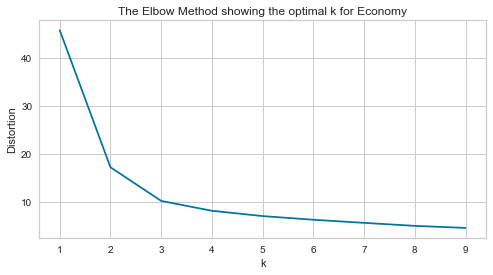

In [12]:
###############
### Economy ###
###############

### Defining the Economy data frame ###
df_economy = df[['HDI', 'LE', 'EYS', 'MYS', 'GNI']]

### The elbow method to define the number of clusters of the Economy data frame ###
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 42)
    kmeanModel.fit(df_economy)
    distortions.append(kmeanModel.inertia_)

### Ploting the elbow method for the Economy data frame ###
plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for Economy')
plt.show()

Number of clusters 2
Score 0.5188966789100651
----------------------------------------------------------------------------------------------------
Number of clusters 3
Score 0.4534130974418136
----------------------------------------------------------------------------------------------------
Number of clusters 4
Score 0.37448579440280294
----------------------------------------------------------------------------------------------------
Number of clusters 5
Score 0.307444678327036
----------------------------------------------------------------------------------------------------
Number of clusters 6
Score 0.2990114224403684
----------------------------------------------------------------------------------------------------
Number of clusters 7
Score 0.30196316609963103
----------------------------------------------------------------------------------------------------
Number of clusters 8
Score 0.30332459522244826
----------------------------------------------------------------------

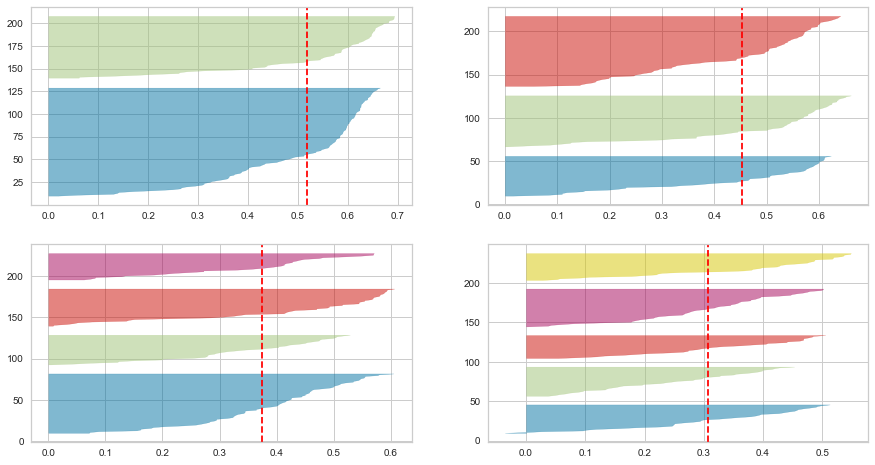

In [13]:
### Silhouette method to verify the number of clusters for the Economy data frame ###
for nc in range(2,10):
    print('Number of clusters', nc)
    kmeans = KMeans(n_clusters = nc, random_state = 42)
    kmeans.fit(df_economy)
    slabels = kmeans.labels_
    ss = silhouette_score(df_economy,slabels)
    print('Score', ss)
    print('--'*50)

### Economy data frame silhouette plot ###
fig, ax = plt.subplots(2,2, figsize=(15,8))

for i in [2,3,4,5]:
    km = KMeans(n_clusters = i, random_state = 42)
    q, mod = divmod(i,2)
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_economy)

[[0.90631495 0.87260318 0.68681464 0.82904866 0.37944918]
 [0.25420367 0.34281718 0.3081967  0.27397112 0.02216431]
 [0.63906338 0.66723691 0.51223352 0.62973179 0.11068308]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


<ipython-input-14-84f0ec22be8f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_economy['Economy'] = pd.DataFrame(labels)


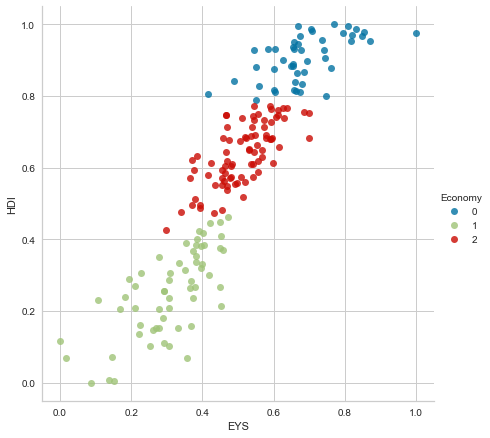

In [14]:
### Fiting the model and ploting an example ###
kmeanModel = KMeans(n_clusters=3, random_state = 42)
kmeanModel.fit(df_economy)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

print(centroids)
print(labels)

 

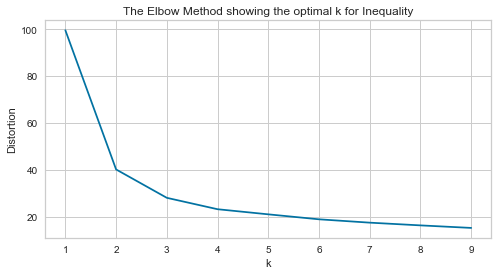

In [15]:
##################
### Inequality ###
##################
df_inequality = df[['IHDI','ILE','IE','II','VE','RPAE','SLF']]

### The elbow method ###
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 42)
    kmeanModel.fit(df_inequality)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for Inequality')
plt.show()

Number of clusters 2
Score 0.51405207789674
----------------------------------------------------------------------------------------------------
Number of clusters 3
Score 0.3902477071089392
----------------------------------------------------------------------------------------------------
Number of clusters 4
Score 0.3532811643213711
----------------------------------------------------------------------------------------------------
Number of clusters 5
Score 0.32282165818399006
----------------------------------------------------------------------------------------------------
Number of clusters 6
Score 0.3070622214592053
----------------------------------------------------------------------------------------------------
Number of clusters 7
Score 0.3017919252741553
----------------------------------------------------------------------------------------------------
Number of clusters 8
Score 0.3013454492214879
-------------------------------------------------------------------------

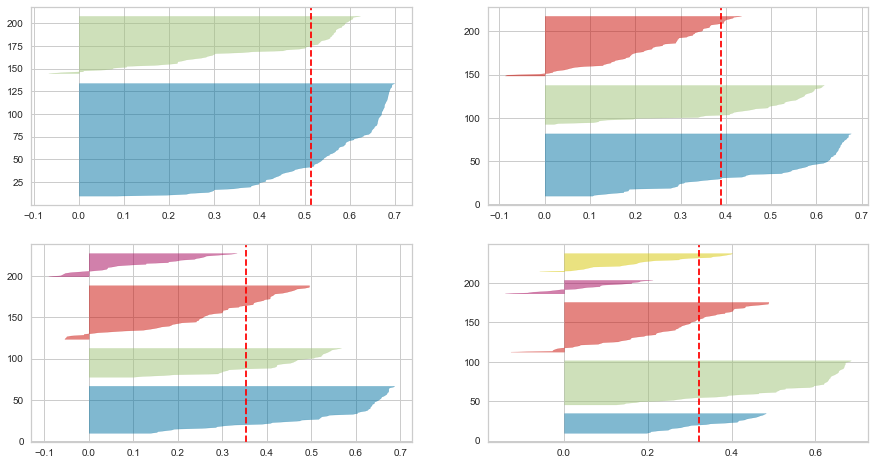

In [16]:
### Silhouette method to verify the number of clusters for the Inequality data frame ###
for nc in range(2,10):
    print('Number of clusters', nc)
    kmeans = KMeans(n_clusters = nc, random_state = 42)
    kmeans.fit(df_inequality)
    labels = kmeans.labels_
    ss = silhouette_score(df_inequality,labels)
    print('Score', ss)
    print('--'*50)

### Ploting Silhouette method ###

fig, ax = plt.subplots(2,2, figsize=(15,8))

for i in [2,3,4,5]:
    km = KMeans(n_clusters = i, random_state = 42)
    q, mod = divmod(i,2)
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_inequality)

[[0.79703847 0.08565982 0.12176636 0.18449338 0.17933066 0.99902251
  0.80808425]
 [0.18138946 0.68153586 0.71519913 0.41233414 0.74121855 0.24615779
  0.20251521]
 [0.51528143 0.29577118 0.36595513 0.37401171 0.39521402 0.92763072
  0.39334831]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 2 2 0 0 2 0 2 0 0 0 2 0 0 2 2 0 2
 2 2 0 2 2 2 0 0 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 2 0 1 2 2 2 0 1 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 1 2 2 2 1 1 2 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


<ipython-input-17-49fc75c1aff1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inequality['Inequality'] = pd.DataFrame(labels)


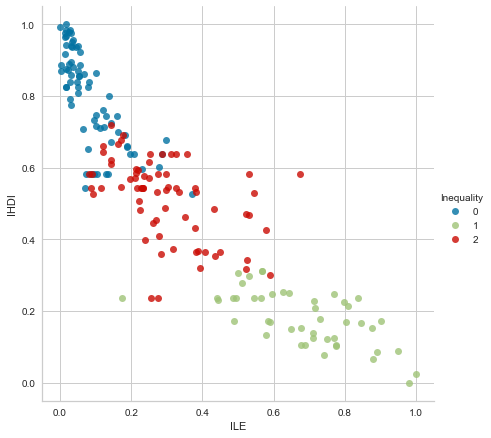

In [17]:
### Fiting the model and ploting an example ###
kmeanModel = KMeans(n_clusters=3, random_state = 42)
kmeanModel.fit(df_inequality)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

print(centroids)
print(labels)

df_inequality['Inequality'] = pd.DataFrame(labels)
sns.lmplot(x='ILE', y='IHDI', data=df_inequality, fit_reg=False, hue='Inequality',height=6)

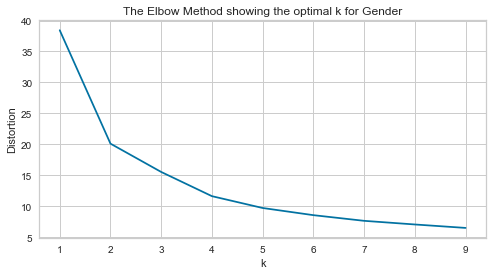

In [18]:
##############
### Gender ###
##############
df_gender = df[['GDIV', 'GIIV','SSP', 'WAFI']]

### The elbow method ###
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 42)
    kmeanModel.fit(df_gender)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for Gender')
plt.show()

Number of clusters 2
Score 0.40258975493766175
----------------------------------------------------------------------------------------------------
Number of clusters 3
Score 0.3150765959129361
----------------------------------------------------------------------------------------------------
Number of clusters 4
Score 0.3332439658213584
----------------------------------------------------------------------------------------------------
Number of clusters 5
Score 0.34309552212528394
----------------------------------------------------------------------------------------------------
Number of clusters 6
Score 0.32720496082926626
----------------------------------------------------------------------------------------------------
Number of clusters 7
Score 0.2886652110532174
----------------------------------------------------------------------------------------------------
Number of clusters 8
Score 0.2970002963888547
---------------------------------------------------------------------

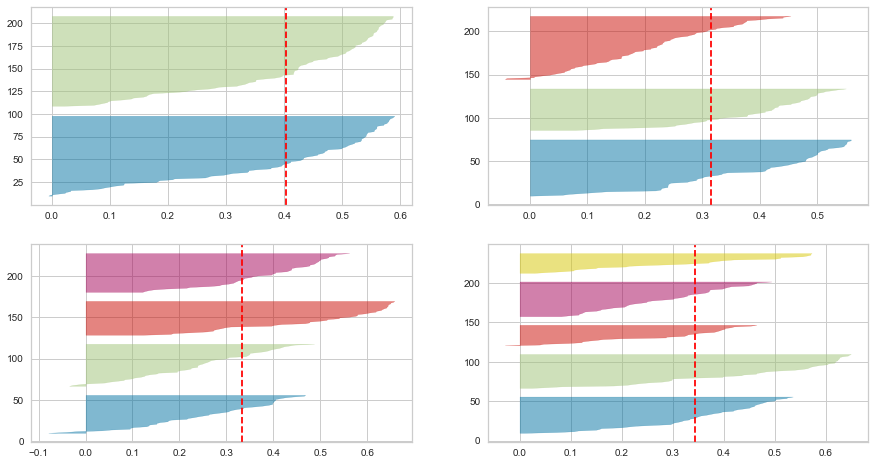

In [19]:
### Silhouette method to verify the number of clusters for the Gender data frame ###
for nc in range(2,10):
    print('Number of clusters', nc)
    kmeans = KMeans(n_clusters = nc, random_state = 42)
    kmeans.fit(df_gender)
    labels = kmeans.labels_
    ss = silhouette_score(df_gender,labels)
    print('Score', ss)
    print('--'*50)

### Ploting Silhouette method ###

fig, ax = plt.subplots(2,2, figsize=(15,8))

for i in [2,3,4,5]:
    km = KMeans(n_clusters = i, random_state = 42)
    q, mod = divmod(i,2)
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_gender)

[[0.87339052 0.38895191 0.24183454 0.75389918]
 [0.85969146 0.48280356 0.55512933 0.4349951 ]
 [0.89881353 0.08983794 0.5728162  0.90376744]
 [0.67785112 0.68937287 0.29046781 0.22755394]]
[2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 0 0 0 0 2 0 1 0 2 0 0 0 0 2 0 0 2 1 1 1 0 0 1 0 0 2 0 3 1 1 1 0 0 0 1
 1 0 0 1 1 0 1 2 1 0 2 1 1 1 1 1 3 3 0 1 0 1 0 1 0 0 0 3 1 0 0 1 1 1 1 0 0
 1 0 1 3 3 0 1 1 1 3 1 3 1 1 1 1 1 3 1 0 1 3 0 3 0 1 3 3 0 1 1 0 3 3 3 3 3
 3 1 0 3 3 3 0 3 3 3 1 1 3 3 1 3 1 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 1
 3 3 3 3]


<ipython-input-20-742a63205567>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender['Gender'] = pd.DataFrame(labels)


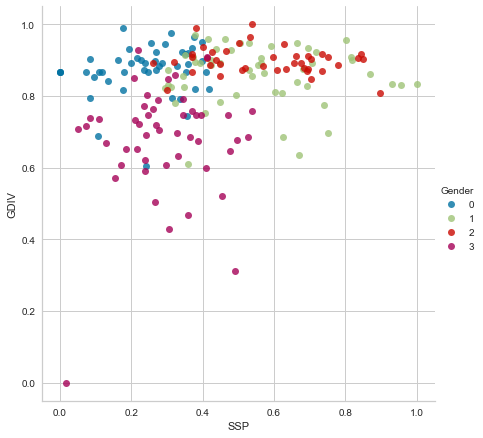

In [20]:
### Fiting the model and ploting an example ###
kmeanModel = KMeans(n_clusters=4, random_state = 42)
kmeanModel.fit(df_gender)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

print(centroids)
print(labels)

df_gender['Gender'] = pd.DataFrame(labels)

sns.lmplot(x='SSP', y='GDIV', data=df_gender, fit_reg=False, hue='Gender',height=6)

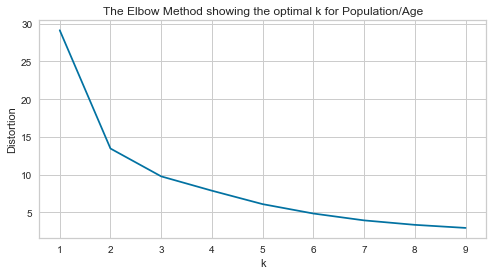

In [21]:
######################
### Population/Age ###
######################
df_population = df[['TP', 'TUP', 'MA']]

### The elbow method ###
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 42)
    kmeanModel.fit(df_population)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for Population/Age')
plt.show()

Number of clusters 2
Score 0.4662319110616909
----------------------------------------------------------------------------------------------------
Number of clusters 3
Score 0.4064248458565657
----------------------------------------------------------------------------------------------------
Number of clusters 4
Score 0.4152655742903215
----------------------------------------------------------------------------------------------------
Number of clusters 5
Score 0.4311139286140091
----------------------------------------------------------------------------------------------------
Number of clusters 6
Score 0.38898755476242136
----------------------------------------------------------------------------------------------------
Number of clusters 7
Score 0.3948633847655508
----------------------------------------------------------------------------------------------------
Number of clusters 8
Score 0.3747130752484337
-----------------------------------------------------------------------

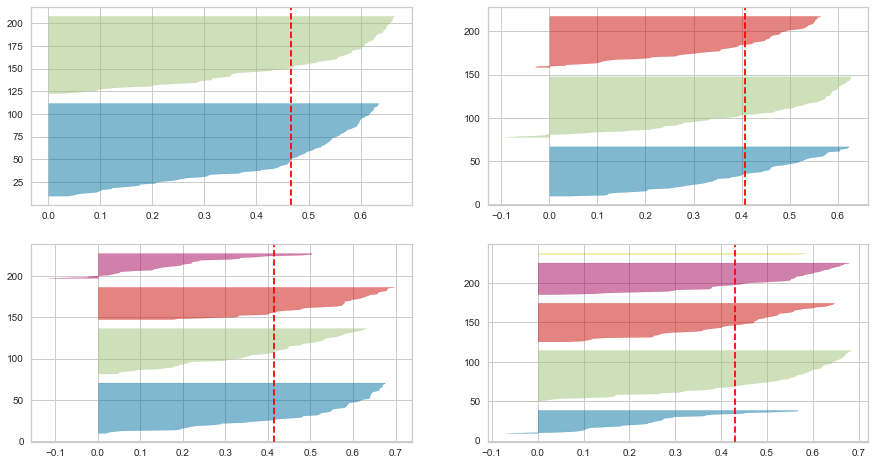

In [22]:
### Silhouette method to verify the number of clusters for the Population/Age data frame ###
for nc in range(2,10):
    print('Number of clusters', nc)
    kmeans = KMeans(n_clusters = nc, random_state = 42)
    kmeans.fit(df_population)
    labels = kmeans.labels_
    ss = silhouette_score(df_population,labels)
    print('Score', ss)
    print('--'*50)

### Ploting Silhouette method ###

fig, ax = plt.subplots(2,2, figsize=(15,8))

for i in [2,3,4,5]:
    km = KMeans(n_clusters = i, random_state = 42)
    q, mod = divmod(i,2)
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_population)

[[0.03556559 0.25544448 0.17248889]
 [0.01818891 0.69433015 0.38696849]
 [0.02210818 0.79830069 0.8054711 ]
 [0.03930206 0.3979114  0.67843164]]
[2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 2 3 3 2 2 2 2 2 2 2 2 1 2 3 2 3 2 2
 2 3 2 1 1 2 3 1 1 1 2 3 1 1 2 2 1 2 2 1 1 3 1 3 1 1 2 3 3 3 3 3 2 1 3 3 3
 1 3 2 3 1 3 3 3 1 1 3 1 3 3 1 3 1 1 1 1 3 1 3 1 1 1 1 1 1 0 1 1 1 1 0 0 0
 1 1 1 1 0 1 3 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


<ipython-input-23-c949b04aaa03>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population['Population'] = pd.DataFrame(labels)


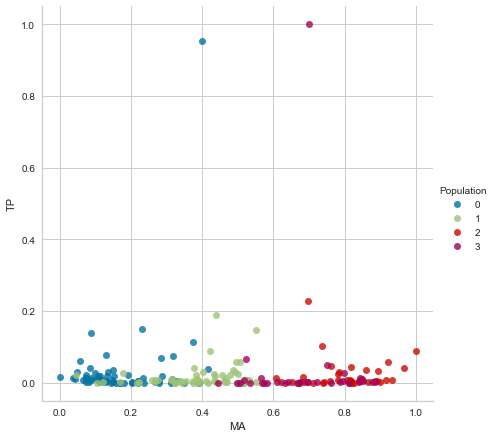

In [23]:
### Fiting the model and ploting an example ###
kmeanModel = KMeans(n_clusters=4, random_state = 42)
kmeanModel.fit(df_population)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

print(centroids)
print(labels)

df_population['Population'] = pd.DataFrame(labels)

sns.lmplot(x='MA', y='TP', data=df_population, fit_reg=False, hue='Population',height=6)

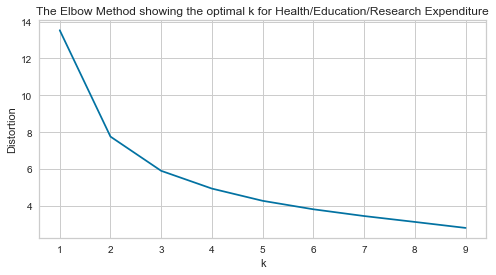

In [24]:
#############################################
### Health/Education/Research Expenditure ###
#############################################
df_expenditure = df[['CHE','GEE','RDE']]

### The elbow method ###
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 42)
    kmeanModel.fit(df_expenditure)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for Health/Education/Research Expenditure')
plt.show()

Number of clusters 2
Score 0.5045199475454233
----------------------------------------------------------------------------------------------------
Number of clusters 3
Score 0.2986093397030442
----------------------------------------------------------------------------------------------------
Number of clusters 4
Score 0.28295815502160854
----------------------------------------------------------------------------------------------------
Number of clusters 5
Score 0.2686063599004784
----------------------------------------------------------------------------------------------------
Number of clusters 6
Score 0.273406786038214
----------------------------------------------------------------------------------------------------
Number of clusters 7
Score 0.2665028297092495
----------------------------------------------------------------------------------------------------
Number of clusters 8
Score 0.2636778729868474
------------------------------------------------------------------------

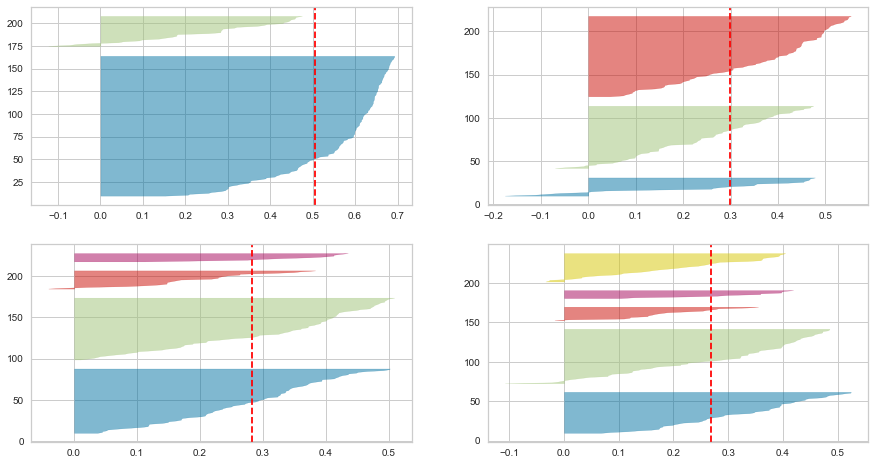

In [25]:
### Silhouette method to verify the number of clusters for the Health/Education/Research Expenditure data frame ###
for nc in range(2,10):
    print('Number of clusters', nc)
    kmeans = KMeans(n_clusters = nc, random_state = 42)
    kmeans.fit(df_expenditure)
    labels = kmeans.labels_
    ss = silhouette_score(df_expenditure,labels)
    print('Score', ss)
    print('--'*50)

### Ploting Silhouette method ###

fig, ax = plt.subplots(2,2, figsize=(15,8))

for i in [2,3,4,5]:
    km = KMeans(n_clusters = i, random_state = 42)
    q, mod = divmod(i,2)
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_expenditure)

[[0.37720736 0.31980064 0.09715144]
 [0.19026941 0.23588424 0.10008329]
 [0.57538058 0.40772031 0.28766234]
 [0.59925142 0.41154048 0.6874649 ]]
[2 0 3 1 2 3 3 2 2 3 3 1 2 3 2 2 3 3 3 3 2 2 3 1 2 2 2 0 0 2 1 0 0 0 0 2 0
 2 0 0 1 1 0 0 1 0 1 0 1 2 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 2 0 1 0 1
 0 1 0 1 1 1 0 0 0 2 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1
 0 1 0 0 1 2 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 2 0 2 1 0 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 2 0 0 1 1 0 1 0 0 1 1 1 0 0 2 1 0
 0 1 0 0]


<ipython-input-26-7fb529e24360>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expenditure['Expenditure'] = pd.DataFrame(labels)


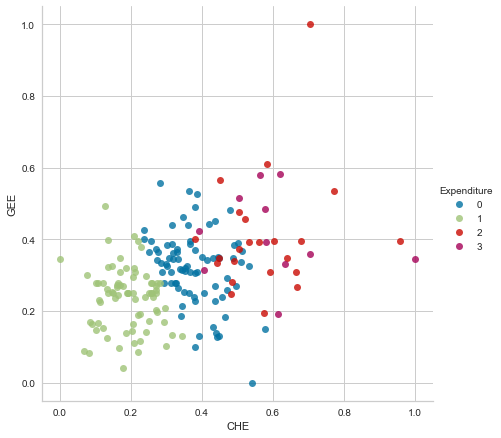

In [26]:
### Fiting the model and ploting an example ###
kmeanModel = KMeans(n_clusters=4, random_state = 42)
kmeanModel.fit(df_expenditure)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

print(centroids)
print(labels)

df_expenditure['Expenditure'] = pd.DataFrame(labels)

sns.lmplot(x='CHE', y='GEE', data=df_expenditure, fit_reg=False, hue='Expenditure',height=6)

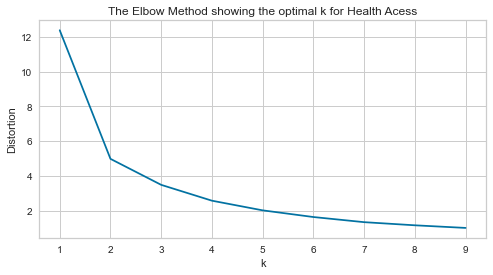

In [27]:
####################
### Health Acess ###
####################
df_health = df[['PPP','HB']]

### The elbow method ###
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 42)
    kmeanModel.fit(df_health)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for Health Acess')
plt.show()

Number of clusters 2
Score 0.556049318894209
----------------------------------------------------------------------------------------------------
Number of clusters 3
Score 0.47742200584024663
----------------------------------------------------------------------------------------------------
Number of clusters 4
Score 0.4771225412372277
----------------------------------------------------------------------------------------------------
Number of clusters 5
Score 0.4851256994241644
----------------------------------------------------------------------------------------------------
Number of clusters 6
Score 0.47046965269582147
----------------------------------------------------------------------------------------------------
Number of clusters 7
Score 0.4683116501270442
----------------------------------------------------------------------------------------------------
Number of clusters 8
Score 0.40692497595379085
----------------------------------------------------------------------

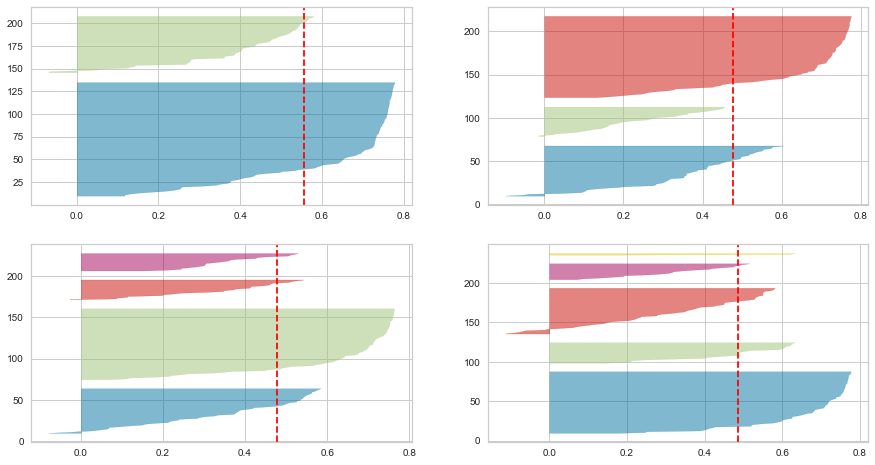

In [28]:
### Silhouette method to verify the number of clusters for the Health Acess data frame ###
for nc in range(2,10):
    print('Number of clusters', nc)
    kmeans = KMeans(n_clusters = nc, random_state = 42)
    kmeans.fit(df_health)
    labels = kmeans.labels_
    ss = silhouette_score(df_health,labels)
    print('Score', ss)
    print('--'*50)

### Ploting Silhouette method ###

fig, ax = plt.subplots(2,2, figsize=(15,8))

for i in [2,3,4,5]:
    km = KMeans(n_clusters = i, random_state = 42)
    q, mod = divmod(i,2)
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_health)

[[0.25320244 0.21321868]
 [0.05061389 0.09206985]
 [0.53637927 0.28749721]
 [0.40323763 0.55731225]]
[0 0 2 0 2 3 2 2 2 2 2 0 0 3 2 0 0 3 2 3 2 0 3 0 2 3 3 0 2 2 0 2 0 2 3 2 3
 2 3 3 0 1 0 3 0 2 0 0 3 0 3 3 3 0 2 3 0 0 3 0 2 0 0 0 3 0 0 2 0 2 0 0 0 0
 0 0 3 0 1 1 2 0 0 0 0 0 1 2 0 3 0 0 1 1 2 0 0 0 3 1 1 0 1 1 0 0 1 1 1 1 1
 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


<ipython-input-29-65aee319e938>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_health['Health'] = pd.DataFrame(labels)


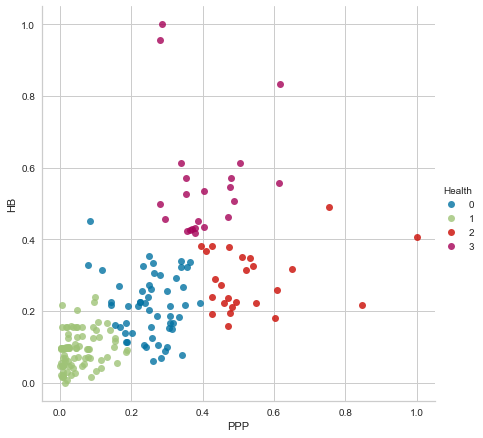

In [29]:
### Fiting the model and ploting an example ###
kmeanModel = KMeans(n_clusters=4, random_state = 42)
kmeanModel.fit(df_health)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

print(centroids)
print(labels)

df_health['Health'] = pd.DataFrame(labels)

sns.lmplot(x='PPP', y='HB', data=df_health, fit_reg=False, hue='Health',height=6)

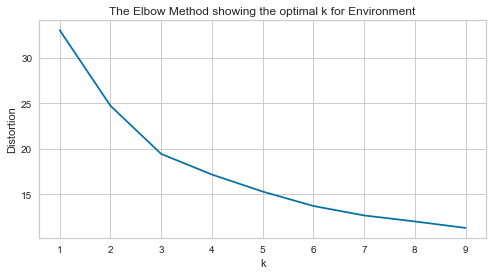

In [30]:
####################
### Environment ###
###################
df_environment = df[['CDEP', 'CDE', 'FA', 'FAC', 'DMC', 'RLI']]

### The elbow method ###
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 42)
    kmeanModel.fit(df_environment)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for Environment')
plt.show()

Number of clusters 2
Score 0.2298991436967026
----------------------------------------------------------------------------------------------------
Number of clusters 3
Score 0.25502996595146865
----------------------------------------------------------------------------------------------------
Number of clusters 4
Score 0.21522955354817158
----------------------------------------------------------------------------------------------------
Number of clusters 5
Score 0.2060374271169518
----------------------------------------------------------------------------------------------------
Number of clusters 6
Score 0.21404251726252452
----------------------------------------------------------------------------------------------------
Number of clusters 7
Score 0.2003671779955804
----------------------------------------------------------------------------------------------------
Number of clusters 8
Score 0.19636952724027995
--------------------------------------------------------------------

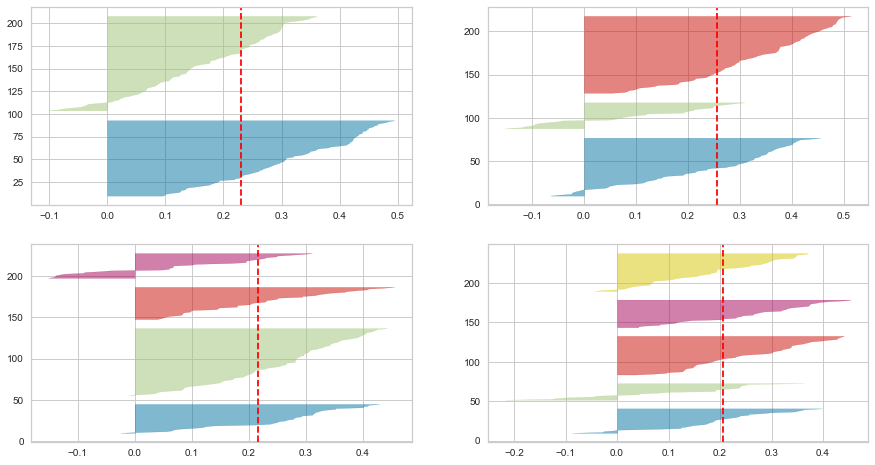

In [31]:
### Silhouette method to verify the number of clusters for the Environment data frame ###
for nc in range(2,10):
    print('Number of clusters', nc)
    kmeans = KMeans(n_clusters = nc, random_state = 42)
    kmeans.fit(df_environment)
    labels = kmeans.labels_
    ss = silhouette_score(df_environment,labels)
    print('Score', ss)
    print('--'*50)

### Ploting Silhouette method ###

fig, ax = plt.subplots(2,2, figsize=(15,8))

for i in [2,3,4,5]:
    km = KMeans(n_clusters = i, random_state = 42)
    q, mod = divmod(i,2)
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_environment)

[[0.10677696 0.22188229 0.69515457 0.26331147 0.1945199  0.73675194]
 [0.07737005 0.21033605 0.19509727 0.27185284 0.15078981 0.85295624]
 [0.04888792 0.20990386 0.35727706 0.25056011 0.11420954 0.53818925]
 [0.33001517 0.47626389 0.21189261 0.31966807 0.46462896 0.82326309]]
[1 1 1 1 1 1 0 3 1 1 0 3 1 1 2 3 3 0 2 0 1 0 0 3 1 1 3 1 3 1 3 1 1 1 3 1 0
 1 1 1 3 3 3 1 3 1 0 0 1 0 3 3 3 1 3 3 0 2 1 3 1 0 0 3 3 2 0 3 1 2 3 2 3 2
 2 2 3 1 0 2 1 1 2 0 3 2 1 1 2 1 1 1 2 2 1 1 0 0 3 3 2 1 1 2 1 1 0 2 2 0 0
 3 0 3 1 1 0 2 0 1 1 0 1 1 1 1 2 1 0 1 2 2 2 2 0 0 0 2 2 2 2 1 1 2 0 0 2 1
 0 2 0 3 2 1 0 2 1 1 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2 0 0 1 1 1 1 2 1 1 1 1
 1 1 1 1]


<ipython-input-32-2eee9f707cb3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_environment['Environment'] = pd.DataFrame(labels)


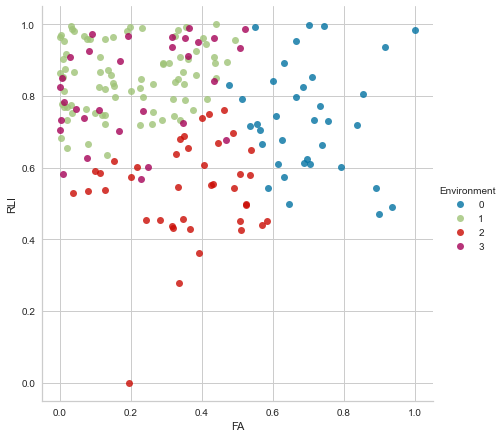

In [32]:
### Fiting the model and ploting an example ###
kmeanModel = KMeans(n_clusters=4, random_state = 42)
kmeanModel.fit(df_environment)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

print(centroids)
print(labels)

df_environment['Environment'] = pd.DataFrame(labels)

sns.lmplot(x='FA', y='RLI', data=df_environment, fit_reg=False, hue='Environment',height=6) 

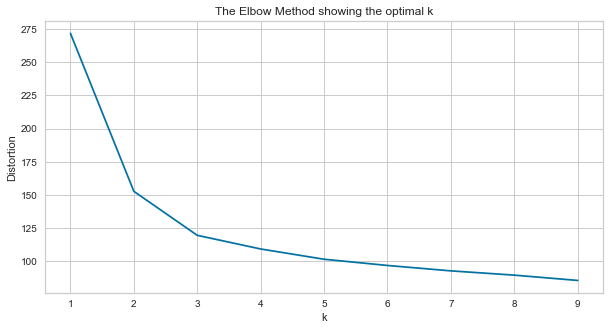

Number of clusters 2
Score 0.36024312356167515
----------------------------------------------------------------------------------------------------
Number of clusters 3
Score 0.27182883266668834
----------------------------------------------------------------------------------------------------
Number of clusters 4
Score 0.20103167657640972
----------------------------------------------------------------------------------------------------
Number of clusters 5
Score 0.19998456845900273
----------------------------------------------------------------------------------------------------
Number of clusters 6
Score 0.18366066739538983
----------------------------------------------------------------------------------------------------
Number of clusters 7
Score 0.19153053660566674
----------------------------------------------------------------------------------------------------
Number of clusters 8
Score 0.20000274096037957
-----------------------------------------------------------------

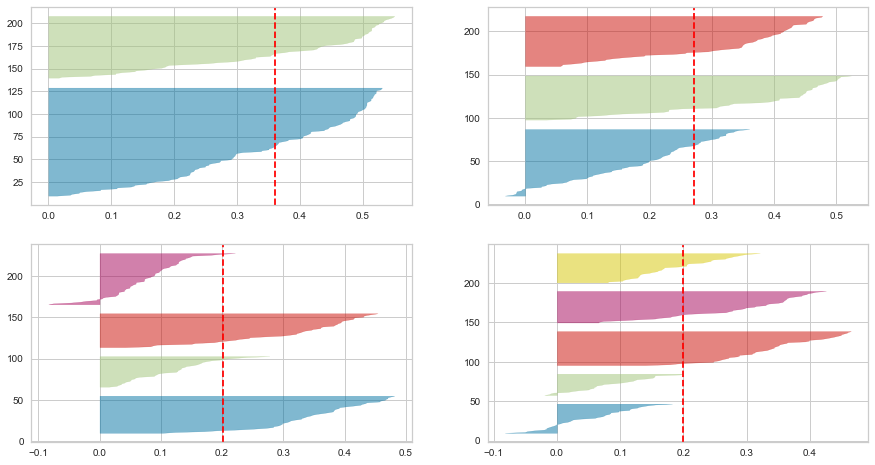

In [33]:
###################################
###### Elbow for ALL COLUMNS ######
###################################
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 42)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##########################################################################
### Silhouette method to verify the number of clusters for ALL COLUMNS ###
##########################################################################

for nc in range(2,10):
    print('Number of clusters', nc)
    kmeans = KMeans(n_clusters = nc, random_state = 42)
    kmeans.fit(df)
    labels = kmeans.labels_
    ss = silhouette_score(df,labels)
    print('Score', ss)
    print('--'*50)

###Ploting Silhouette method for ALL COLUMNS!!!  ###
fig, ax = plt.subplots(2,2, figsize=(15,8))

for i in [2,3,4,5]:
    km = KMeans(n_clusters = i, random_state = 42)
    q, mod = divmod(i,2)
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)    

In [34]:
############################
### Final Results so far ###
############################
df_full = pd.concat([df_country,df_economy['Economy'],df_inequality['Inequality'],df_gender['Gender'],df_population['Population'],df_expenditure['Expenditure'],df_health['Health'],df_environment['Environment']], axis=1)

df_full.set_index('Country',inplace=True)
df_full.head()

,Economy,Inequality,Gender,Population,Expenditure,Health,Environment
Country,,,,,,,
Norway,0,0,2,2,2,0,1
Ireland,0,0,2,3,0,0,1
Switzerland,0,0,2,2,3,2,1
"Hong Kong, China (SAR)",0,0,0,2,1,0,1
Iceland,0,0,2,2,2,2,1


In [35]:
pd.DataFrame(df_full).to_csv("cluster_results_hdi.csv", index=False)

In [36]:
df_full.loc['Brazil'][:]

Economy        2
Inequality     2
Gender         0
Population     1
Expenditure    2
Health         0
Environment    0
Name: Brazil, dtype: int32

In [37]:
list(df_full[df_full['Economy']==2].index.values)

['Montenegro',
 'Romania',
 'Palau',
 'Kazakhstan',
 'Russian Federation',
 'Belarus',
 'Turkey',
 'Uruguay',
 'Bulgaria',
 'Panama',
 'Bahamas',
 'Barbados',
 'Oman',
 'Georgia',
 'Costa Rica',
 'Malaysia',
 'Kuwait',
 'Serbia',
 'Mauritius',
 'Seychelles',
 'Trinidad and Tobago',
 'Albania',
 'Cuba',
 'Iran (Islamic Republic of)',
 'Sri Lanka',
 'Bosnia and Herzegovina',
 'Grenada',
 'Mexico',
 'Saint Kitts and Nevis',
 'Ukraine',
 'Antigua and Barbuda',
 'Peru',
 'Thailand',
 'Armenia',
 'North Macedonia',
 'Colombia',
 'Brazil',
 'China',
 'Ecuador',
 'Saint Lucia',
 'Azerbaijan',
 'Dominican Republic',
 'Moldova (Republic of)',
 'Algeria',
 'Lebanon',
 'Fiji',
 'Dominica',
 'Maldives',
 'Tunisia',
 'Saint Vincent and the Grenadines',
 'Suriname',
 'Mongolia',
 'Botswana',
 'Jamaica',
 'Jordan',
 'Paraguay',
 'Tonga',
 'Libya',
 'Uzbekistan',
 'Bolivia (Plurinational State of)',
 'Indonesia',
 'Philippines',
 'Belize',
 'Samoa',
 'Turkmenistan',
 'Venezuela (Bolivarian Republic of)

In [38]:
list(df_full[df_full['Inequality']==2].index.values)

['Bahrain',
 'Turkey',
 'Uruguay',
 'Panama',
 'Bahamas',
 'Barbados',
 'Costa Rica',
 'Kuwait',
 'Trinidad and Tobago',
 'Iran (Islamic Republic of)',
 'Sri Lanka',
 'Grenada',
 'Mexico',
 'Saint Kitts and Nevis',
 'Antigua and Barbuda',
 'Peru',
 'Thailand',
 'Colombia',
 'Brazil',
 'China',
 'Ecuador',
 'Saint Lucia',
 'Dominican Republic',
 'Algeria',
 'Fiji',
 'Dominica',
 'Maldives',
 'Tunisia',
 'Saint Vincent and the Grenadines',
 'Suriname',
 'Jamaica',
 'Jordan',
 'Paraguay',
 'Uzbekistan',
 'Bolivia (Plurinational State of)',
 'Indonesia',
 'Philippines',
 'Belize',
 'Turkmenistan',
 'Venezuela (Bolivarian Republic of)',
 'South Africa',
 'Palestine, State of',
 'Egypt',
 'Marshall Islands',
 'Viet Nam',
 'Gabon',
 'Morocco',
 'Guyana',
 'Iraq',
 'El Salvador',
 'Cabo Verde',
 'Guatemala',
 'Nicaragua',
 'Bhutan',
 'India',
 'Honduras',
 'Bangladesh',
 'Kiribati',
 'Sao Tome and Principe',
 'Micronesia (Federated States of)',
 "Lao People's Democratic Republic",
 'Eswatini (

In [39]:
list(df_full[df_full['Gender']==0].index.values)

['Hong Kong, China (SAR)',
 'Liechtenstein',
 'Malta',
 'Slovakia',
 'Hungary',
 'Saudi Arabia',
 'Bahrain',
 'Chile',
 'Qatar',
 'Brunei Darussalam',
 'Romania',
 'Palau',
 'Kazakhstan',
 'Russian Federation',
 'Turkey',
 'Uruguay',
 'Oman',
 'Georgia',
 'Malaysia',
 'Kuwait',
 'Mauritius',
 'Iran (Islamic Republic of)',
 'Sri Lanka',
 'Bosnia and Herzegovina',
 'Saint Kitts and Nevis',
 'Ukraine',
 'Thailand',
 'Brazil',
 'Fiji',
 'Maldives',
 'Saint Vincent and the Grenadines',
 'Mongolia',
 'Botswana',
 'Jamaica',
 'Tonga',
 'Libya',
 'Belize',
 'Samoa',
 'Venezuela (Bolivarian Republic of)',
 'Marshall Islands',
 'India',
 'Kiribati',
 'Micronesia (Federated States of)',
 'Vanuatu',
 'Kenya',
 'Solomon Islands',
 'Papua New Guinea']

In [40]:
list(df_full[df_full['Population']==1].index.values)

['Israel',
 'United Arab Emirates',
 'Saudi Arabia',
 'Bahrain',
 'Qatar',
 'Argentina',
 'Brunei Darussalam',
 'Palau',
 'Kazakhstan',
 'Turkey',
 'Panama',
 'Bahamas',
 'Oman',
 'Costa Rica',
 'Malaysia',
 'Iran (Islamic Republic of)',
 'Mexico',
 'Peru',
 'Colombia',
 'Brazil',
 'Ecuador',
 'Dominican Republic',
 'Algeria',
 'Lebanon',
 'Fiji',
 'Dominica',
 'Tunisia',
 'Suriname',
 'Mongolia',
 'Botswana',
 'Jamaica',
 'Jordan',
 'Paraguay',
 'Libya',
 'Uzbekistan',
 'Bolivia (Plurinational State of)',
 'Indonesia',
 'Turkmenistan',
 'Venezuela (Bolivarian Republic of)',
 'South Africa',
 'Palestine, State of',
 'Marshall Islands',
 'Gabon',
 'Morocco',
 'Iraq',
 'El Salvador',
 'Cabo Verde',
 'Nicaragua',
 'Honduras',
 'Sao Tome and Principe',
 'Equatorial Guinea',
 'Angola',
 'Congo',
 'Syrian Arab Republic',
 'Djibouti',
 'Haiti']

In [41]:
list(df_full[df_full['Expenditure']==2].index.values)

['Norway',
 'Iceland',
 'Australia',
 'Netherlands',
 'United Kingdom',
 'New Zealand',
 'Canada',
 'Liechtenstein',
 'Slovenia',
 'Spain',
 'France',
 'Czechia',
 'Italy',
 'Andorra',
 'Portugal',
 'Palau',
 'Cuba',
 'Brazil',
 'Marshall Islands',
 'Kiribati',
 'Micronesia (Federated States of)',
 'Afghanistan',
 'Sierra Leone']

In [42]:
list(df_full[df_full['Health']==0].index.values)

['Norway',
 'Ireland',
 'Hong Kong, China (SAR)',
 'Singapore',
 'United Kingdom',
 'Canada',
 'United States',
 'Slovenia',
 'Luxembourg',
 'Malta',
 'United Arab Emirates',
 'Cyprus',
 'Saudi Arabia',
 'Chile',
 'Qatar',
 'Brunei Darussalam',
 'Montenegro',
 'Palau',
 'Turkey',
 'Panama',
 'Bahamas',
 'Oman',
 'Costa Rica',
 'Malaysia',
 'Kuwait',
 'Mauritius',
 'Seychelles',
 'Albania',
 'Iran (Islamic Republic of)',
 'Sri Lanka',
 'Bosnia and Herzegovina',
 'Grenada',
 'Mexico',
 'Saint Kitts and Nevis',
 'Antigua and Barbuda',
 'North Macedonia',
 'Colombia',
 'Brazil',
 'China',
 'Ecuador',
 'Dominican Republic',
 'Algeria',
 'Lebanon',
 'Tunisia',
 'Saint Vincent and the Grenadines',
 'Suriname',
 'Jordan',
 'Libya',
 'Uzbekistan',
 'Turkmenistan',
 'Venezuela (Bolivarian Republic of)',
 'Palestine, State of',
 'Kyrgyzstan',
 'Tajikistan',
 'Timor-Leste']

In [43]:
list(df_full[df_full['Environment']==0].index.values)

['Sweden',
 'Finland',
 'Austria',
 'Japan',
 'Slovenia',
 'Korea (Republic of)',
 'Latvia',
 'Brunei Darussalam',
 'Montenegro',
 'Palau',
 'Panama',
 'Costa Rica',
 'Malaysia',
 'Seychelles',
 'Peru',
 'Brazil',
 'Saint Vincent and the Grenadines',
 'Suriname',
 'Bolivia (Plurinational State of)',
 'Belize',
 'Samoa',
 'Venezuela (Bolivarian Republic of)',
 'Marshall Islands',
 'Gabon',
 'Guyana',
 'Bhutan',
 'Sao Tome and Principe',
 'Micronesia (Federated States of)',
 "Lao People's Democratic Republic",
 'Equatorial Guinea',
 'Zambia',
 'Congo',
 'Solomon Islands',
 'Papua New Guinea',
 'Congo (Democratic Republic of the)',
 'Guinea-Bissau']